In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [ ]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", nrows=5000)

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     5000 non-null   object 
 1   CRASH TIME                     5000 non-null   object 
 2   BOROUGH                        3289 non-null   object 
 3   ZIP CODE                       3287 non-null   float64
 4   LATITUDE                       4580 non-null   float64
 5   LONGITUDE                      4580 non-null   float64
 6   LOCATION                       4580 non-null   object 
 7   ON STREET NAME                 3666 non-null   object 
 8   CROSS STREET NAME              2345 non-null   object 
 9   OFF STREET NAME                1334 non-null   object 
 10  NUMBER OF PERSONS INJURED      5000 non-null   int64  
 11  NUMBER OF PERSONS KILLED       5000 non-null   int64  
 12  NUMBER OF PEDESTRIANS INJURED  5000 non-null   i

In [ ]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          1711
ZIP CODE                         1713
LATITUDE                          420
LONGITUDE                         420
LOCATION                          420
ON STREET NAME                   1334
CROSS STREET NAME                2655
OFF STREET NAME                  3666
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      25
CONTRIBUTING FACTOR VEHICLE 2    1080
CONTRIBUTING FACTOR VEHICLE 3    4477
CONTRIBUTING FACTOR VEHICLE 4    4851
CONTRIBUTING FACTOR VEHICLE 5    4952
COLLISION_ID                        0
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1616
VEHICLE TYPE

In [ ]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [ ]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,3287.000000,4580.000000,4580.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5.000000e+03
mean,10879.816854,40.520116,-73.547571,0.464200,0.004400,0.068200,0.001800,0.044600,0.000400,0.3368,0.002000,4.446654e+06
std,528.003911,2.880198,5.226314,0.797775,0.069149,0.260696,0.042392,0.211234,0.019998,0.7696,0.048954,4.680870e+04
min,10000.000000,0.000000,-74.244840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,4.136992e+06
25%,10456.000000,40.663839,-73.963964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,4.408676e+06
50%,11207.000000,40.713154,-73.921903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,4.455988e+06
75%,11236.000000,40.788957,-73.871899,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,4.457788e+06
max,11693.000000,40.905174,0.000000,7.000000,2.000000,2.000000,1.000000,2.000000,1.000000,7.0000,2.000000,4.761583e+06


In [ ]:
df.duplicated().sum()

df= df.drop_duplicates()

df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,04/21/2021,12:00,NaN,NaN,40.690865,-73.802530,"(40.690865, -73.80253)",LAKEWOOD AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4409351,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
4996,04/23/2021,18:30,NaN,NaN,40.629807,-74.140960,"(40.629807, -74.14096)",NaN,NaN,7 WALKER STREET,...,Unspecified,NaN,NaN,NaN,4410333,Sedan,Sedan,NaN,NaN,NaN
4997,04/23/2021,12:32,QUEENS,11432.0,40.704697,-73.796810,"(40.704697, -73.79681)",JAMAICA AVENUE,163 STREET,NaN,...,NaN,NaN,NaN,NaN,4409791,Sedan,NaN,NaN,NaN,NaN
4998,04/21/2021,13:20,NaN,NaN,40.777410,-73.978806,"(40.77741, -73.978806)",WEST 72 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4409623,Box Truck,NaN,NaN,NaN,NaN


In [ ]:
df_model = df[['BOROUGH', 'CRASH TIME', 'VEHICLE TYPE CODE 1','NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1']].copy()

In [ ]:
df_model.dropna(inplace=True)

In [ ]:
df_model.head()

,BOROUGH,CRASH TIME,VEHICLE TYPE CODE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1
2,BROOKLYN,1:29,Moped,1,0,Unspecified
9,BROOKLYN,9:35,Sedan,0,0,Unspecified
13,BRONX,8:17,Sedan,2,0,Unspecified
14,BROOKLYN,21:10,Sedan,0,0,Driver Inexperience
15,MANHATTAN,14:58,Sedan,0,0,Passing Too Closely


In [ ]:
df_model['HOUR'] = pd.to_datetime(df_model['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour
df_model.drop(columns=['CRASH TIME'], inplace=True)

In [ ]:
df_model.dropna(inplace=True)

In [ ]:
df_model['injury'] = (df_model['NUMBER OF PERSONS INJURED'] > 0).astype(int)

In [ ]:
df_model = pd.get_dummies(df_model)

In [ ]:
df_model.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'HOUR',
       'injury', 'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND', 'VEHICLE TYPE CODE 1_3-Door',
       ...
       'CONTRIBUTING FACTOR VEHICLE 1_Reaction to Uninvolved Vehicle',
       'CONTRIBUTING FACTOR VEHICLE 1_Steering Failure',
       'CONTRIBUTING FACTOR VEHICLE 1_Tinted Windows',
       'CONTRIBUTING FACTOR VEHICLE 1_Tire Failure/Inadequate',
       'CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded',
       'CONTRIBUTING FACTOR VEHICLE 1_Turning Improperly',
       'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Lane Changing',
       'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed',
       'CONTRIBUTING FACTOR VEHICLE 1_Unspecified',
       'CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited'],
      dtype='object', length=105)

In [ ]:
X = df_model.drop('injury', axis=1)
y = df_model['injury']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[660   0]
 [  0 313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       313

    accuracy                           1.00       973
   macro avg       1.00      1.00      1.00       973
weighted avg       1.00      1.00      1.00       973



In [ ]:
trainData, validData = train_test_split(df_model, test_size = 0.4, random_state = 7)

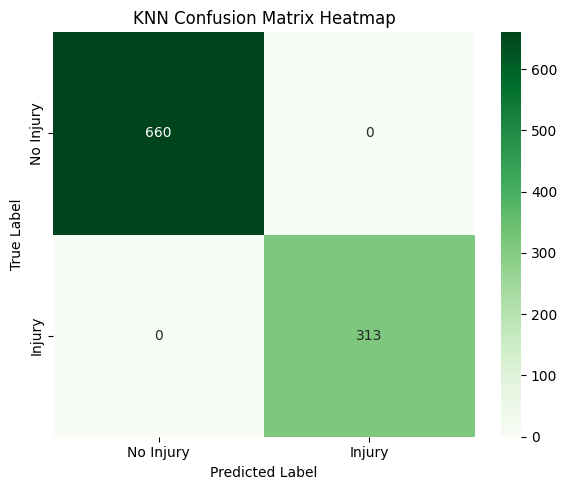

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Define class labels
labels = ['No Injury', 'Injury']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Injuries by Hour of Day')

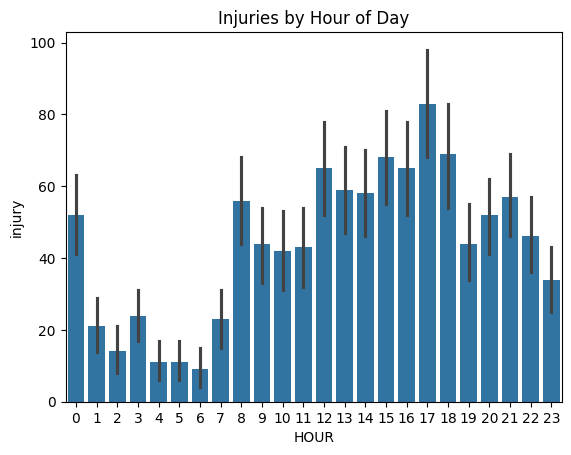

In [ ]:
sns.barplot(x='HOUR', y='injury', data=df_model, estimator=sum)
plt.title("Injuries by Hour of Day")

In [ ]:
#trainData.astype(float)
trainData.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'HOUR',
       'injury', 'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND', 'VEHICLE TYPE CODE 1_3-Door',
       ...
       'CONTRIBUTING FACTOR VEHICLE 1_Reaction to Uninvolved Vehicle',
       'CONTRIBUTING FACTOR VEHICLE 1_Steering Failure',
       'CONTRIBUTING FACTOR VEHICLE 1_Tinted Windows',
       'CONTRIBUTING FACTOR VEHICLE 1_Tire Failure/Inadequate',
       'CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded',
       'CONTRIBUTING FACTOR VEHICLE 1_Turning Improperly',
       'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Lane Changing',
       'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed',
       'CONTRIBUTING FACTOR VEHICLE 1_Unspecified',
       'CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited'],
      dtype='object', length=105)

In [ ]:
trainData.dtypes

NUMBER OF PERSONS INJURED                                int64
NUMBER OF PERSONS KILLED                                 int64
HOUR                                                     int32
injury                                                   int64
BOROUGH_BRONX                                             bool
                                                         ...  
CONTRIBUTING FACTOR VEHICLE 1_Turning Improperly          bool
CONTRIBUTING FACTOR VEHICLE 1_Unsafe Lane Changing        bool
CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed                bool
CONTRIBUTING FACTOR VEHICLE 1_Unspecified                 bool
CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited     bool
Length: 105, dtype: object

In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=7)
tree_model.fit(trainData.drop('NUMBER OF PERSONS INJURED', axis=1), trainData['NUMBER OF PERSONS INJURED'])

DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=7)

In [ ]:
DecisionTreeClassifier(max_depth=7,min_samples_leaf=50, random_state=7)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=7)

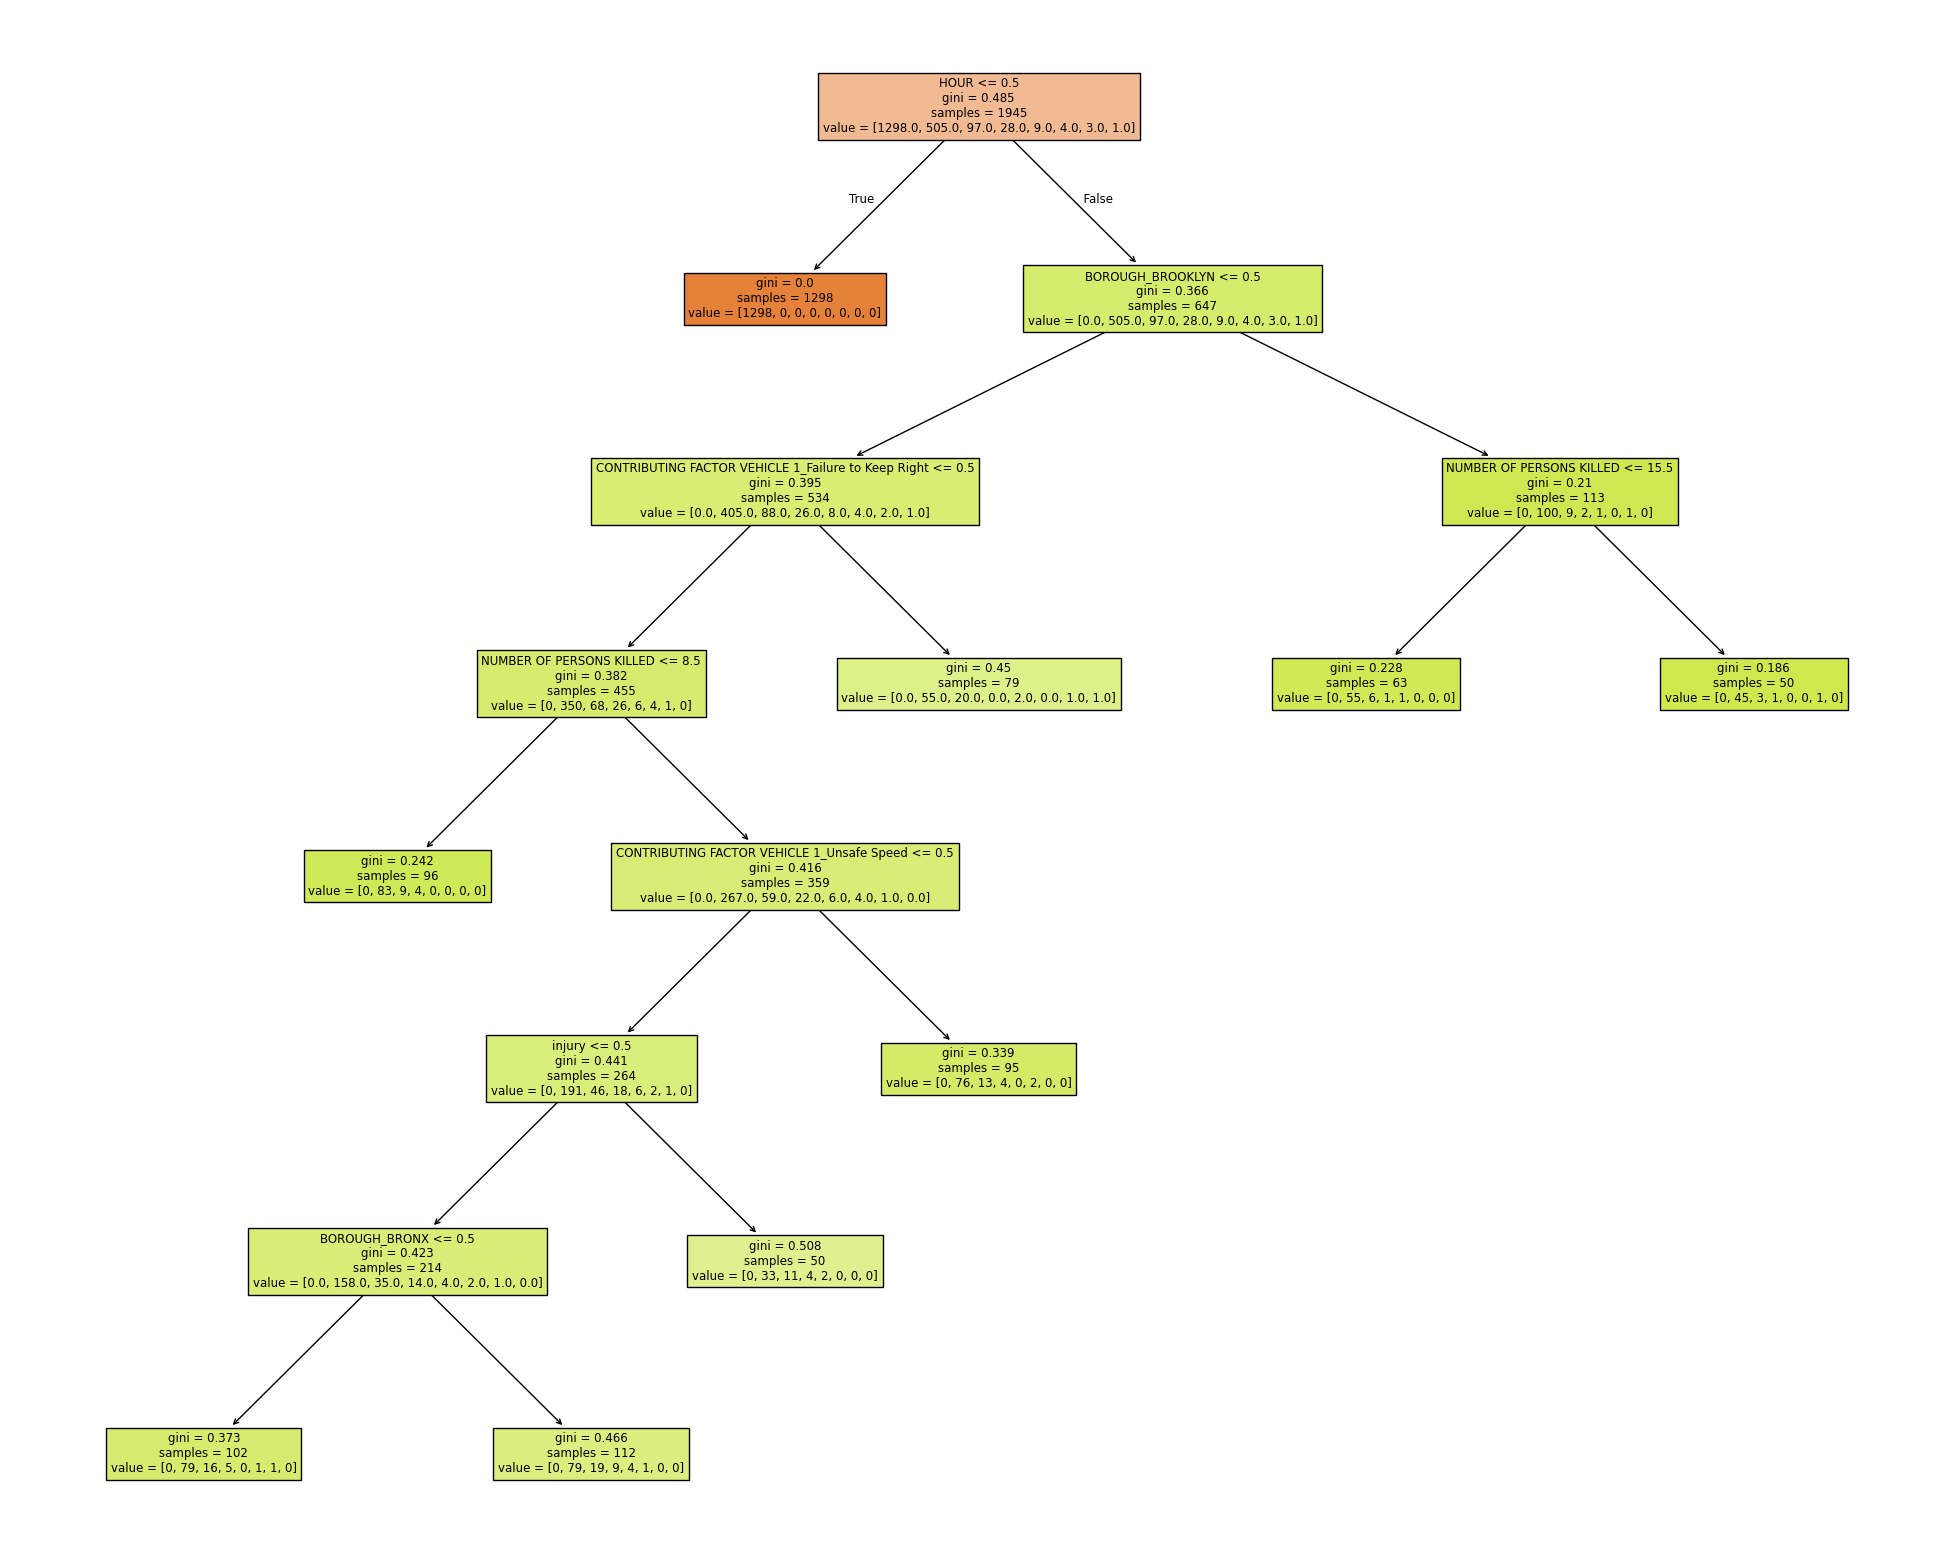

In [ ]:
text_representation = tree.export_text(tree_model)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model,
                   feature_names=validData.columns,
                   filled=True)
fig.savefig("tree_model.png")

In [ ]:
X = df_model[['HOUR','BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
              'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND']]  # example features
y = df_model['injury']  # binary target: 1 = injury, 0 = no injury

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can tune k later
knn_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred_knn = knn_model.predict(X_test)

# Step 5: Output performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[585  75]
 [276  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       660
           1       0.33      0.12      0.17       313

    accuracy                           0.64       973
   macro avg       0.50      0.50      0.47       973
weighted avg       0.57      0.64      0.58       973

Accuracy: 0.6392600205549845
